The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

<hr>

### questions that can be derived from this dataset
- how does genoristy correlate with score?
- does a country's economy correlate with their overall "happiness"?

<hr>

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [185]:
happy_df = pd.read_csv('csvfiles/happiness/2018.csv')
happy_df

happy_df_gdp = pd.read_csv('csvfiles/happiness/GDP.csv')
happy_df_gdp2018 = happy_df_gdp['2018']

<hr>

### preprocessing

In [186]:
# print(happy_df.columns)
# print(happy_df.isnull().sum())
# happy_df.describe()
# happy_df_sample = happy_df.head(40)
# print(happy_df_gdp2018.isnull().sum())

In [187]:
# x = happy_df_sample['Overall rank']
# y = happy_df_sample['Country or region']

# plt.figure(figsize=(8,10))
# plt.barh(y, x) 
# plt.xlabel('Rank')
# plt.ylabel('Country or region')
# plt.title('Rank of Countries or Regions')

<hr>

### merging dataset with GDP info

In [188]:
df_merged = pd.merge(happy_df, happy_df_gdp[['Country ', '2018']], 
                     right_on='Country ', 
                     left_on='Country or region', 
                     how='inner') # only rows that exits on both that datasets will be brought

df_merged = df_merged.drop('Country ', axis=1)

# deleting rows without GDP data
df_merged = df_merged.dropna(subset=['2018'])

df_merged

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,2018
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,48416.936030
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,65510.585270
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,55671.165270
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,57303.060780
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,68060.941050
...,...,...,...,...,...,...,...,...,...,...
131,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,1308.629536
132,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,2251.556388
133,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3240.262937
135,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,859.935620


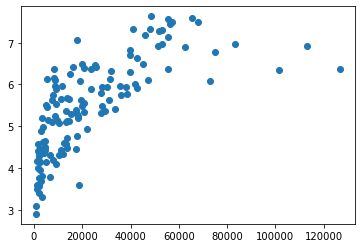

In [189]:
x = df_merged['2018']
y = df_merged['Score']
plt.scatter(x,y)
plt.show()

Tthe graph seems to have an upwards trend. Suggesting a positive correlation between GDP per capita and happiness. We should notice that after a certain level of GDP per capita, the happiness score seems to decrease. If we want a function that fits that data, a good call would be a quadratic function:

- $f(x) = ax² + bx + c$

<hr>

### creating quadratic model

Regression:
y = -5.086896549295292e-10 x² + 7.87176426296343e-05x + 4.18     R² = 0.68 


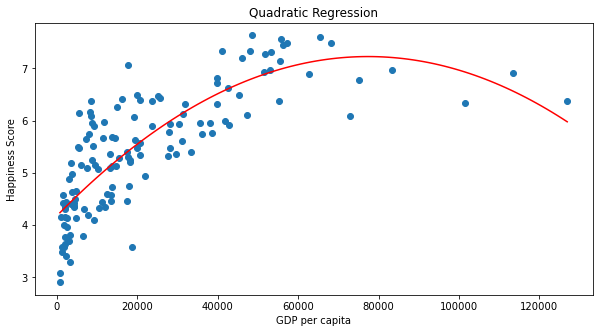

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# defining x and f(x)
X = df_merged['2018'].values.reshape(-1, 1)  
y = df_merged['Score']  # explained variable (f(x))

# polynomial features to 2nd degree (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# creating and adjusting the regression model
reg = LinearRegression().fit(X_poly, y)

# getting a, b and c
coef = reg.coef_ # the values of a and b are now stored in this array
c = reg.intercept_

# calculating the coefficient of determination (R²)
r2 = reg.score(X_poly,y)

print(f"Regression:\ny = {coef[2]} x² + {coef[1]}x + {round(c,2)}     R² = {round(r2, 2)} ")

# generating values for x
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predicting the values with the model for plotting the regression
y_pred = reg.predict(poly_features.transform(x_values))

plt.figure(figsize= (10,5))

plt.title("Quadratic Regression")
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

plt.scatter(X,y)

plt.plot(x_values, y_pred, 'red')

plt.show()

In [191]:
max_index = np.argmax(y_pred)
x_max = x_values[max_index]

print(x_max)

[77201.29954352]
